In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


DATA PREPROCESSING

In [2]:
df= pd.read_csv('uber.csv')

In [3]:
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.drop(columns=["Unnamed: 0","key"],inplace=True)


In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(), inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)

In [11]:
#change the format of prickup_datetime
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [12]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [13]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525299,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [14]:
df=df.assign(
        hour= df.pickup_datetime.dt.hour,
        day=df.pickup_datetime.dt.day,
        month=df.pickup_datetime.dt.month,
        year=df.pickup_datetime.dt.year,
        dayOfweek=df.pickup_datetime.dt.dayofweek)

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayOfweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [16]:
df=df.drop(["pickup_datetime"],axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayOfweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [17]:
def dist_formula(longitude1,latitude1,longitude2, latitude2):
    travel_dist=[]
    
    for pos in range(len(longitude1)):
        lon1,lan1,lon2,lan2=map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_lon=lon2-lon1
        dist_lan=lan2-lan1
                                         
        a= sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2
        c=2*asin(sqrt(a))*6371
        travel_dist.append(c)
    return travel_dist
                                         

In [18]:
df['dist_travel_km']= dist_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

In [19]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayOfweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


REMOVE OUTLIERS

In [20]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    
    df1[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df1 , c)
    return df1

In [21]:
df = treat_outliers_all(df, df.columns)


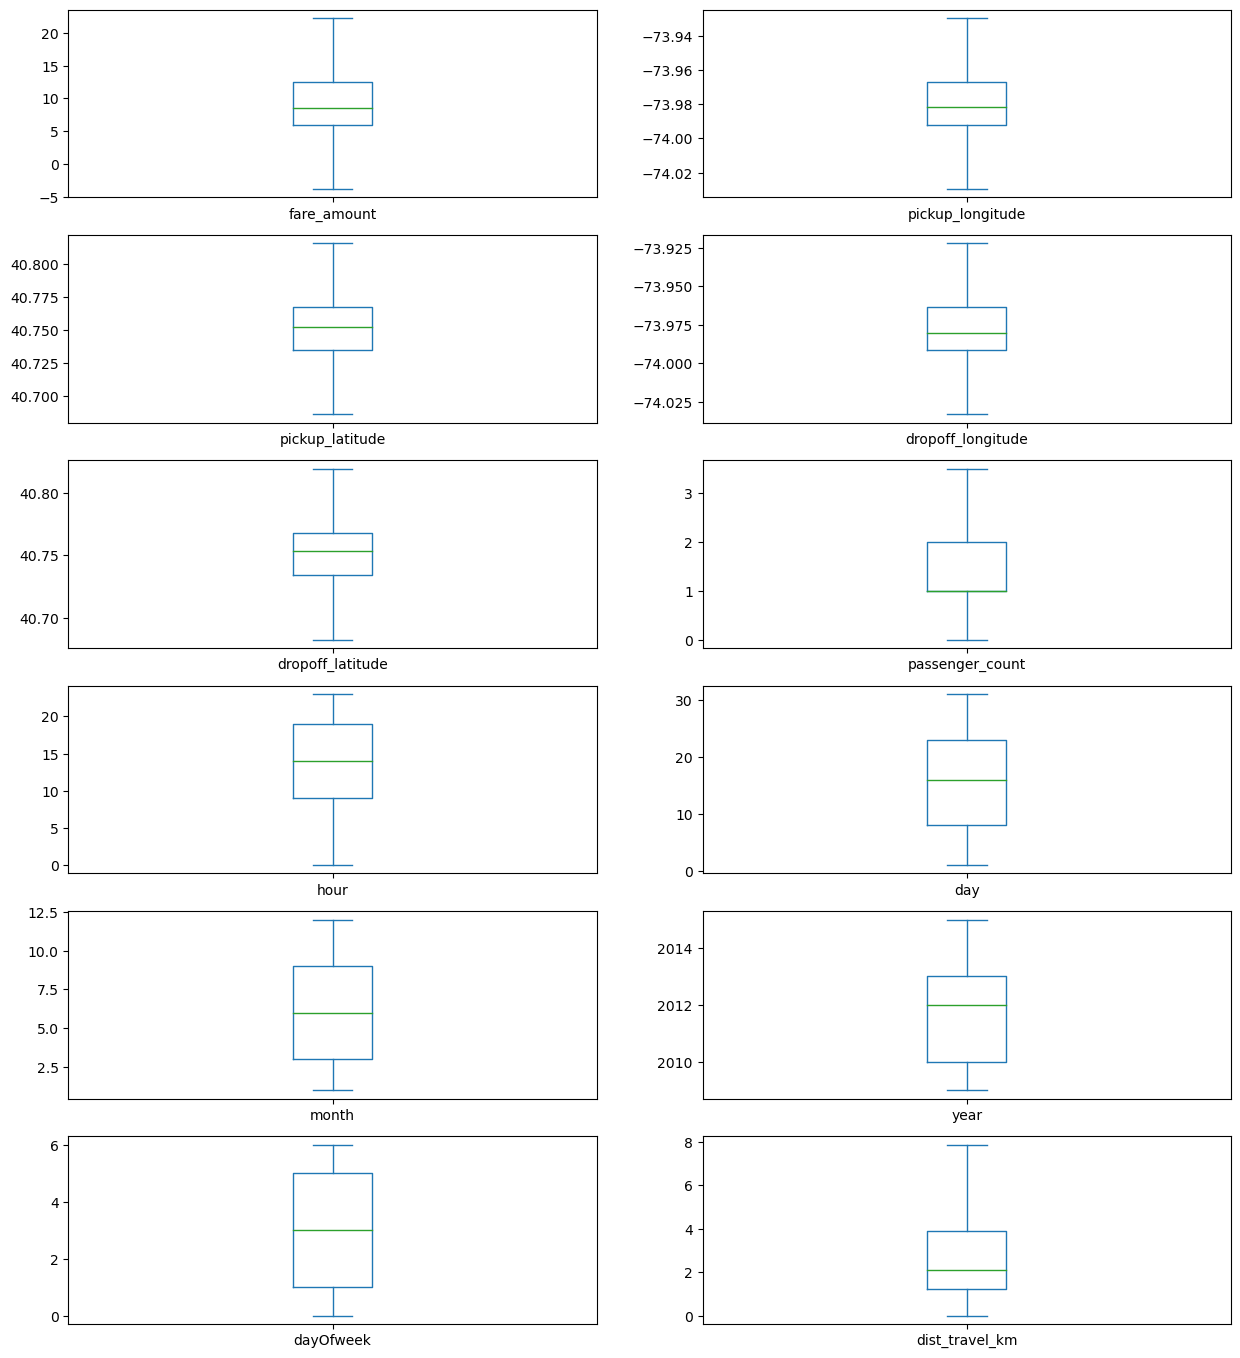

In [22]:
#Boxplot shows that dataset is free from outliers
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 
plt.show()

CORRELATION 

In [23]:
corr=df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayOfweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.844374
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.098094
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.046812
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.186531
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.038900
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009709
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.038366
day,0.004534,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.003062
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.011628
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.024278


<Axes: >

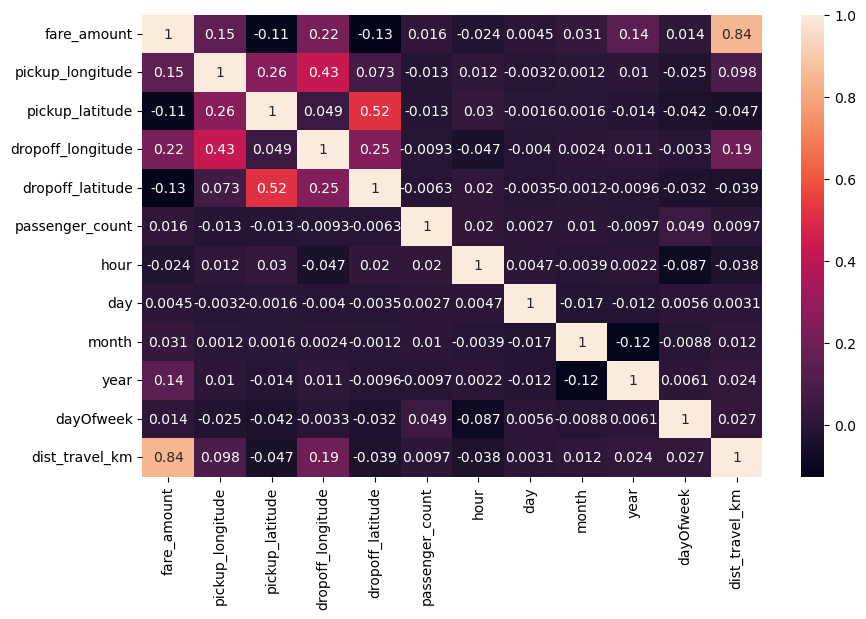

In [24]:
fig,axis=plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

LINEAR REGRESSION

In [25]:
# Dividing the dataset into feature and target values 
df_x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayOfweek','dist_travel_km']]
df_y = df['fare_amount']

In [26]:
#Dividing into training and test set
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=1)

In [27]:
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred_lin=lrmodel.predict(x_test)
print(y_pred_lin)

[ 6.27615184  5.09986098  9.43641238 ... 11.07663949 12.15392248
 11.41496075]


RANDOM FOREST

In [29]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
y_pred_rf=rf.predict(x_test)
print(y_pred_rf)

[ 4.8815  5.668   9.185  ... 11.175  11.084  13.276 ]


In [31]:
cols=['Model','RMSE', 'R-Squared']
result_tabulation=pd.DataFrame(columns=cols)

SCORES

In [32]:
reg_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_lin))
reg_squared=r2_score(y_test,y_pred_lin)
full_metrics=pd.Series({'Model':'Linear Regression','RMSE':reg_RMSE,'R-squared':reg_squared})

result_tabulation=result_tabulation.append(full_metrics,ignore_index=True)
result_tabulation

C:\Users\Aarushi\AppData\Local\Temp\ipykernel_18404\2175053604.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation=result_tabulation.append(full_metrics,ignore_index=True)


,Model,RMSE,R-Squared,R-squared
0,Linear Regression,2.703957,NaN,0.753906


In [33]:
rf_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf))
rf_squared=r2_score(y_test,y_pred_rf)
full_metrics= pd.Series({'Model':'Random Forest','RMSE':rf_RMSE,'R_squared':rf_squared})

result_tabulation=result_tabulation.append(full_metrics,ignore_index=True)
result_tabulation

C:\Users\Aarushi\AppData\Local\Temp\ipykernel_18404\2093518564.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation=result_tabulation.append(full_metrics,ignore_index=True)


,Model,RMSE,R-Squared,R-squared,R_squared
0,Linear Regression,2.703957,NaN,0.753906,NaN
1,Random Forest,2.363763,NaN,NaN,0.811935
